# Chapter 5

In [12]:
from image_processing import *

%matplotlib inline

## 5.1

In [13]:
x = array([[17, 24, 1, 8, 15], 
           [23, 5, 7, 14, 16], 
           [4, 6, 13, 20, 22], 
           [10, 12, 19, 21, 3], 
           [11, 18, 25, 2, 9]])
x = x * 10
x

array([[170, 240,  10,  80, 150],
       [230,  50,  70, 140, 160],
       [ 40,  60, 130, 200, 220],
       [100, 120, 190, 210,  30],
       [110, 180, 250,  20,  90]], dtype=uint8)

In [14]:
x[0:3, 0:3].mean()

111.11111111111111

In [15]:
x[0:3, 1:4].mean()

108.88888888888889

In [16]:
for i in range(x.shape[0] - 2):
    for j in range(x.shape[1] - 2):
        print(format(x[i:i+3, j:j+3].mean(), ".4f"), end="  ")
    print()

111.1111  108.8889  128.8889  
110.0000  130.0000  150.0000  
131.1111  151.1111  148.8889  


## 5.4

In [17]:
a = ones((3, 3)) / 9
a

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [18]:
convolve(x, a)

array([[ 76,  85,  65,  67,  58],
       [ 87, 111, 108, 128, 105],
       [ 66, 109, 130, 150, 106],
       [ 67, 131, 151, 148,  85],
       [ 56, 105, 107,  87,  38]], dtype=uint8)

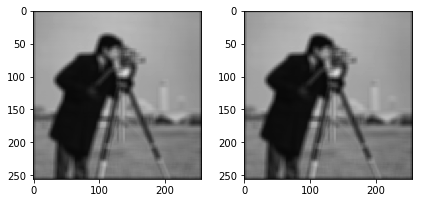

In [19]:
plt.subplot(1, 2, 1)
cf = convolve(cameraman, ones((9, 9)) / 81)
imshow(cf)

plt.subplot(1, 2, 2)
cf2 = uniform_filter(cameraman, 9)
imshow(cf2)

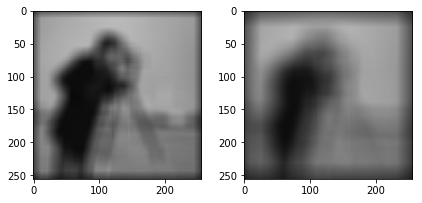

In [20]:
plt.subplot(1, 2, 1)
cf = uniform_filter(cameraman, 25)
imshow(cf)
#print(cf)

plt.subplot(1, 2, 2)
cf2 = uniform_filter(cameraman, 50)
imshow(cf2)
#print(cf2)

## 5.5

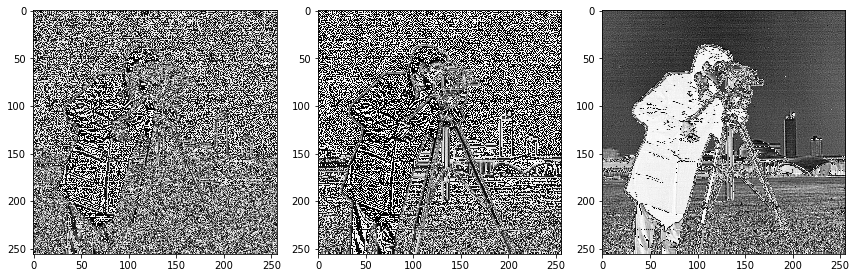

In [21]:
plt.figure(figsize=(12, 12))
plt.subplot(1, 3, 1)
f = array([[1, 4, 1], 
           [4, -20, 4], 
           [1, 4, 1]])
cf = convolve(cameraman, f, mode="reflect")
imshow(cf)

plt.subplot(1, 3, 2)
cf2 = laplace(cameraman)
imshow(cf2)

plt.subplot(1, 3, 3)
cf3 = gaussian_laplace(cameraman, 0.5)
imshow(cf3)

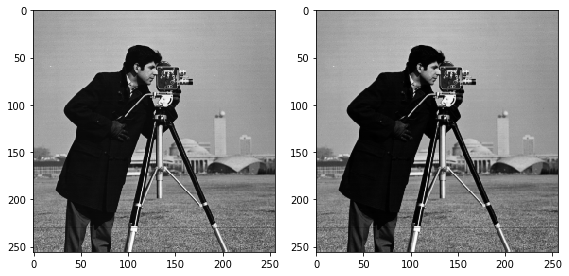

In [22]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
imshow(cameraman)

plt.subplot(1, 2, 2)
cf2 = convolve(cameraman.astype(float64), f)
mincf2, maxcf2 = cf2.min(), cf2.max()
cf2f = (cf2 - mincf2) / (maxcf2 - mincf2)
imshow(cf2f, vmin=0, vmax=1, cmap="gray")

## 5.6

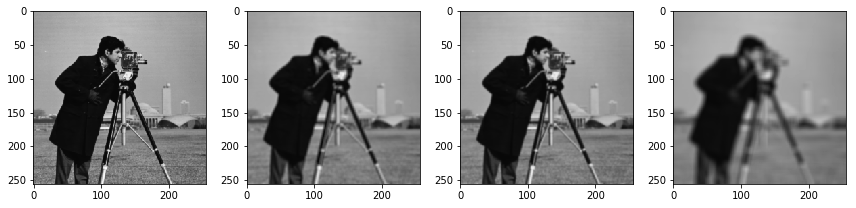

In [23]:
plt.figure(figsize=(12, 12))

plt.subplot(1, 4, 1)
cg1 = gaussian_filter(cameraman, 0.5, truncate=4.5)
imshow(cg1)

plt.subplot(1, 4, 2)
cg1 = gaussian_filter(cameraman, 2, truncate=1)
imshow(cg1)

plt.subplot(1, 4, 3)
cg1 = gaussian_filter(cameraman, 1, truncate=5)
imshow(cg1)

plt.subplot(1, 4, 4)
cg1 = gaussian_filter(cameraman, 5, truncate=1)
imshow(cg1)

In [24]:
x = zeros((5, 5), dtype=float64)
x[2, 2] = 1
gaussian_filter(x, 1, truncate=2).round(7)

array([[0.002969 , 0.0133062, 0.0219382, 0.0133062, 0.002969 ],
       [0.0133062, 0.0596343, 0.0983203, 0.0596343, 0.0133062],
       [0.0219382, 0.0983203, 0.1621028, 0.0983203, 0.0219382],
       [0.0133062, 0.0596343, 0.0983203, 0.0596343, 0.0133062],
       [0.002969 , 0.0133062, 0.0219382, 0.0133062, 0.002969 ]])

## 5.7

In [25]:
id = zeros((3, 3))
id[1, 1] = 1
id

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 0]], dtype=uint8)

In [26]:
# k = 1.5, s = 3
u = 3 * id - 2 * a
u

array([[-0.22222222, -0.22222222, -0.22222222],
       [-0.22222222,  2.77777778, -0.22222222],
       [-0.22222222, -0.22222222, -0.22222222]])

-117.77777777777777 343.7777777777778


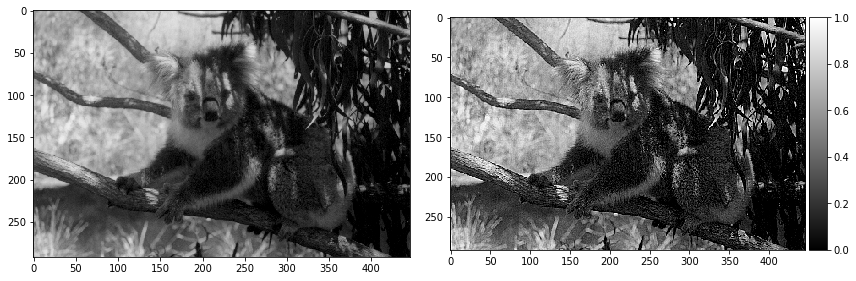

In [44]:
plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
imshow(koala)

plt.subplot(1, 2, 2)
ku = convolve(koala.astype(float), u, mode="reflect")

print(ku.min(), ku.max())
imshow(ku/255, vmin=0, vmax=1, cmap="gray")

-230.22222222222223 522.6666666666667


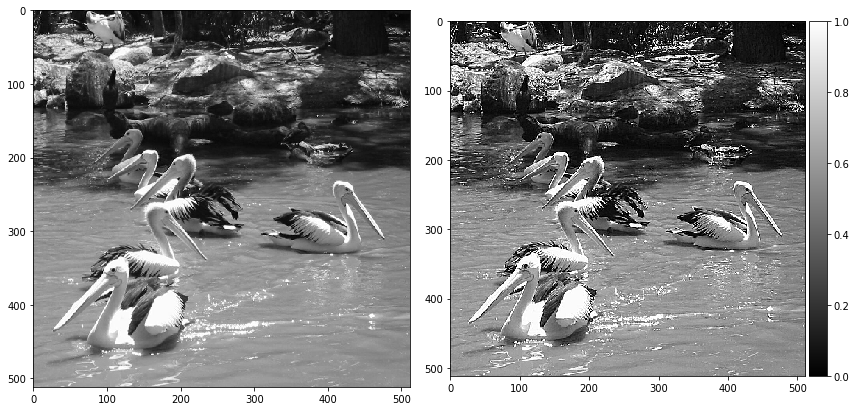

In [46]:
plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
imshow(pelicans)

plt.subplot(1, 2, 2)
ku = convolve(pelicans.astype(float), u, mode="reflect")

print(ku.min(), ku.max())
imshow(ku/255, vmin=0, vmax=1, cmap="gray")

### p107

-351.6666666666667 671.9999999999999


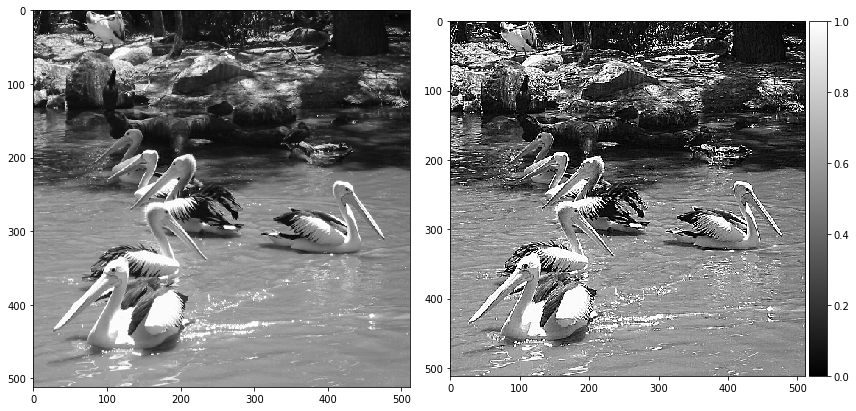

In [41]:
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
imshow(pelicans)

plt.subplot(1, 2, 2)
pu = convolve(pelicans.astype(float), unsharp(0.5), mode="reflect")
imshow(pu/255, vmin=0, vmax=1, cmap="gray")
print(pu.min(), pu.max()) # vmin = 30000

In [30]:
hb2 = 1.25 * id - 0.25 * a
hb2

array([[-0.02777778, -0.02777778, -0.02777778],
       [-0.02777778,  1.22222222, -0.02777778],
       [-0.02777778, -0.02777778, -0.02777778]])

-10.0 245.13888888888886


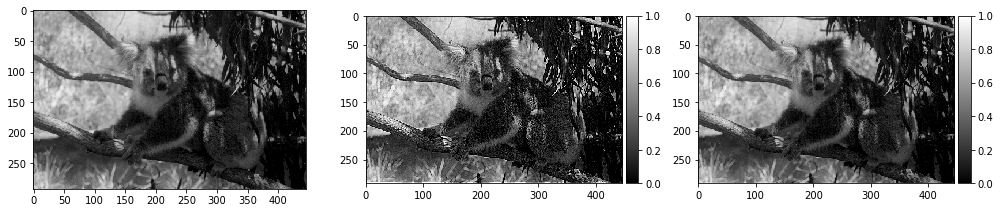

In [31]:
plt.figure(figsize=(14, 14))
plt.subplot(1, 3, 1)
imshow(koala)

plt.subplot(1, 3, 2)
ku = convolve(koala.astype(float), u)
# print(ku.min(), ku.max())
imshow(ku / 255, vmin=0, vmax=1, cmap="gray")

plt.subplot(1, 3, 3)
ku = convolve(koala.astype(float), hb2)
print(ku.min(), ku.max())
imshow(ku / 255, vmin=0, vmax=1, cmap="gray")

## 5.8

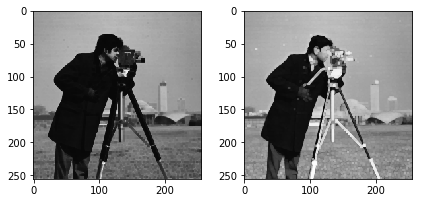

In [32]:
plt.subplot(1, 2, 1)
cmin = generic_filter(cameraman, min, [3, 3])
imshow(cmin)

plt.subplot(1, 2, 2)
cmax = generic_filter(cameraman, max, [3, 3])
imshow(cmax)

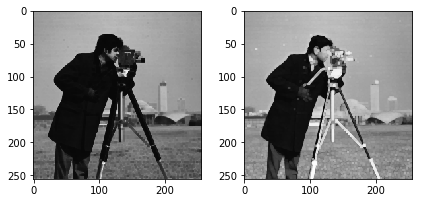

In [33]:
plt.subplot(1, 2, 1)
cmin = minimum_filter(cameraman, size=(3, 3))
imshow(cmin)

plt.subplot(1, 2, 2)
cmax = maximum_filter(cameraman, size=(3, 3))
imshow(cmax)

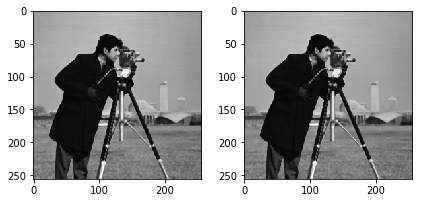

In [34]:
plt.subplot(1, 2, 1)
cmin = median_filter(cameraman, size=(3, 3))
imshow(cmin)

plt.subplot(1, 2, 2)
cmax = rank_filter(cameraman, 4, size=(3, 3))
imshow(cmax)

In [35]:
def rms(x):
    return sqrt(mean(x**2))

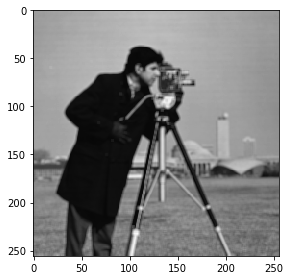

In [36]:
crms = generic_filter(cameraman, rms, size=(3, 3))
imshow(crms)

## 5.10

In [37]:
m = monkey[55:281, 220:412]
m.shape

(226, 192)

In [38]:
xi = array([60, 27, 14, 78, 130, 139])
yi = array([14, 38, 127, 177, 160, 69])
roi = zeros_like(m)
r, c = polygon(yi, xi)
roi[c, r] = 1
r, c

(array([ 15,  15,  15, ..., 176, 176, 176]),
 array([59, 60, 61, ..., 79, 80, 81]))

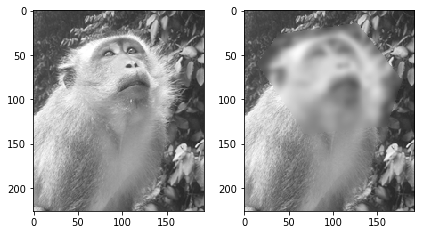

In [39]:
plt.subplot(1, 2, 1)
imshow(m)

plt.subplot(1, 2, 2)
mg = img_as_ubyte(gaussian_filter(m, 3))
mr = mg * roi + m * (1 - roi)
imshow(mr)

#plt.subplot(1, 4, 3)
#mg = convolve(m.astype(float), unsharp()) / 200000
#mr = mg * roi + m * (1 - roi)
#imshow(mr, vmin=0, vmax=1, cmap="gray")
#print(mr.min(), mr.max())